In [1]:
import scanpy as sc
import squidpy as sq
from moscot.problems.spatiotemporal import SpatioTemporalProblem
from scipy.stats import pearsonr, spearmanr
from scipy.spatial import distance
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics.cluster import adjusted_rand_score, adjusted_mutual_info_score
import numpy as np
import json
import torch
from scipy.spatial import distance
import sys
import importlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import scanpy as sc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Replicates


1. E12_DevCell
2. E11lungR1
3. E11lungR2
4. E11lungR3
5. E11lungR4
6. E11lungR5
7. E12lungR2
8. E12lungR3
9. E12lungR4
10. E12lungR5
11. E13lungR1
12. E13lungR2
13. E13lungR3
14. E13lungR4
15. E11_iScience_R1
16. E12_Science
17. E12_CellReports
18. E13_CellReports


In [2]:
#adata.obs['timepoint']

In [3]:
###
import os
sys.path.append(os.path.abspath("FRLC"))
import FRLC
import FRLC_multimarginal
import importlib
import HiddenMarkovOT

importlib.reload(HiddenMarkovOT)
importlib.reload(FRLC)
importlib.reload(FRLC_multimarginal)
###

<module 'FRLC_multimarginal' from '/home/ph3641/HMOT/FRLC/FRLC_multimarginal.py'>

In [8]:
import util_LR
importlib.reload(util_LR)

from util_LR import convert_adata


filehandle_lung = '/scratch/gpfs/ph3641/lung/Lung_dbit_srf_CellReports_Science_with_pseudotime.h5ad'

sys.path.insert(0, filehandle_lung)

adata = sc.read_h5ad(filehandle_lung)
replicates = ['E11lungR1', 'E12lungR2', 'E13lungR1']
timepoints = ['E11.5', 'E12.5', 'E13.5']

C_factors_sequence, A_factors_sequence, Qs, labels, rank_list, _spatial_list = convert_adata(adata, \
                                                                              replicates=replicates, \
                                                                              timepoints=timepoints)



Iteration: 0
Iteration: 25
Iteration: 50
Iteration: 75
Initial Wasserstein cost: 1.5940646846956952e-07, GW-cost: 1.2131952953635568e-14, Total cost: 1.4346581167501427e-07
Final Wasserstein cost: 1.3258284070616355e-07, GW-cost: 1.1915403898472322e-14, Total cost: 1.1932455379337625e-07


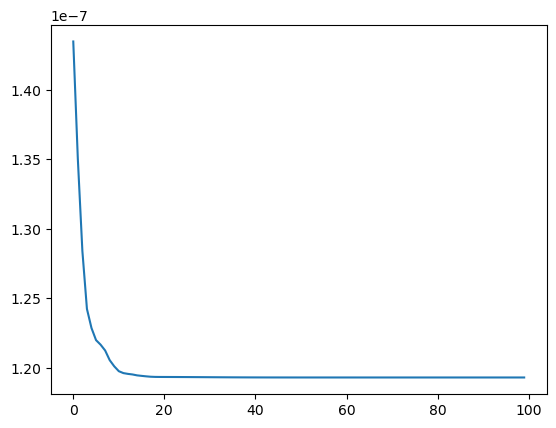

Iteration: 0
Iteration: 25
Iteration: 50
Iteration: 75
Initial Wasserstein cost: 1.0618575174703437e-07, GW-cost: 7.687811636749274e-15, Total cost: 9.556717373015999e-08
Final Wasserstein cost: 9.472137918464796e-08, GW-cost: 7.517242918094781e-15, Total cost: 8.524924055564043e-08


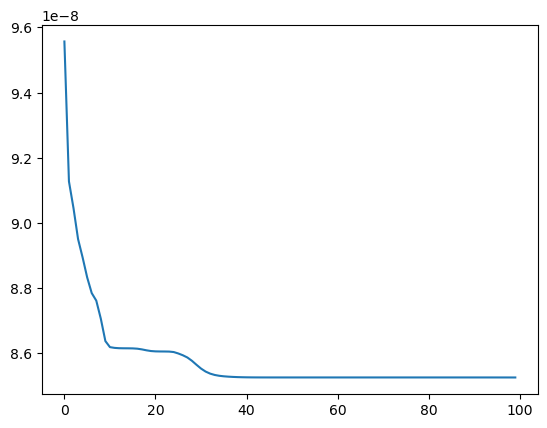

AttributeError: module 'clustering' has no attribute 'diffmap_from_QT'

In [9]:
import objective_grad
import clustering
import HiddenMarkovOT

device = 'cpu'
dtype=torch.float32

gamma = 40
tau_out = 5
tau_in = 1e-5
alpha = 0.1 #0.0001

hmot = HiddenMarkovOT.HM_OT(rank_list, tau_in = tau_in, tau_out=tau_out, \
                              gamma=gamma, max_iter=100, min_iter=100, device=device, dtype=dtype, \
                             printCost=True, returnFull=False, alpha=alpha, \
                              initialization='Full', init_args = None)

hmot.impute_annotated_transitions(C_factors_sequence, A_factors_sequence, Qs)

Ts_ann = [T.cpu().numpy() for T in hmot.T_gammas]
Qs_ann = [Q.cpu().numpy() for Q in Qs]


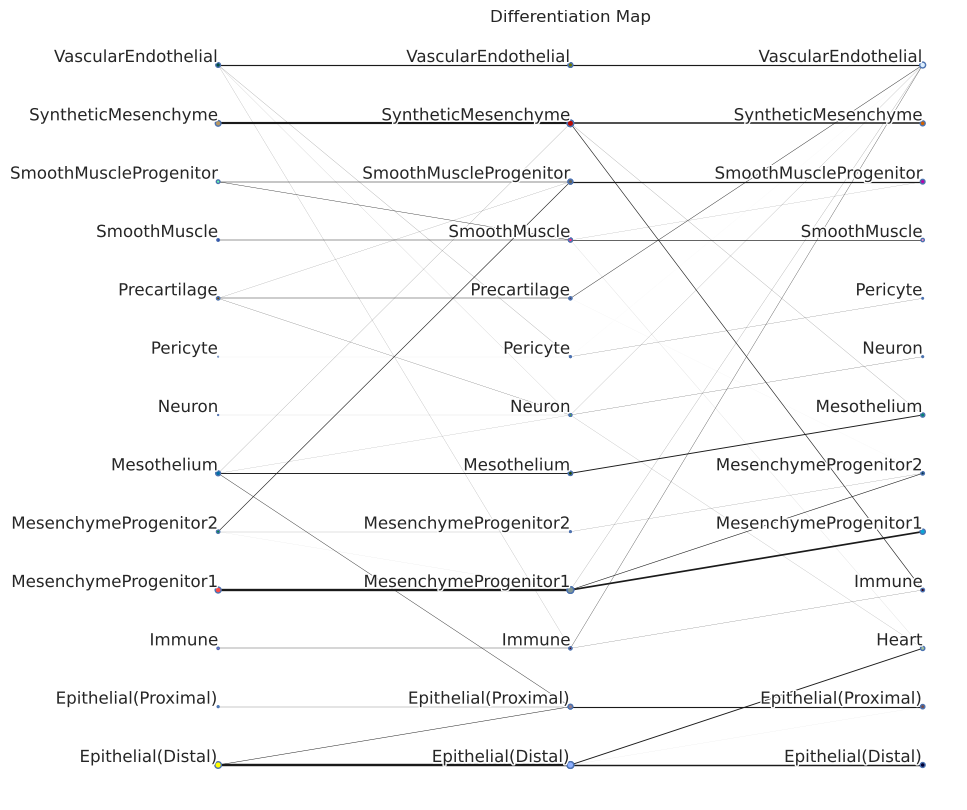

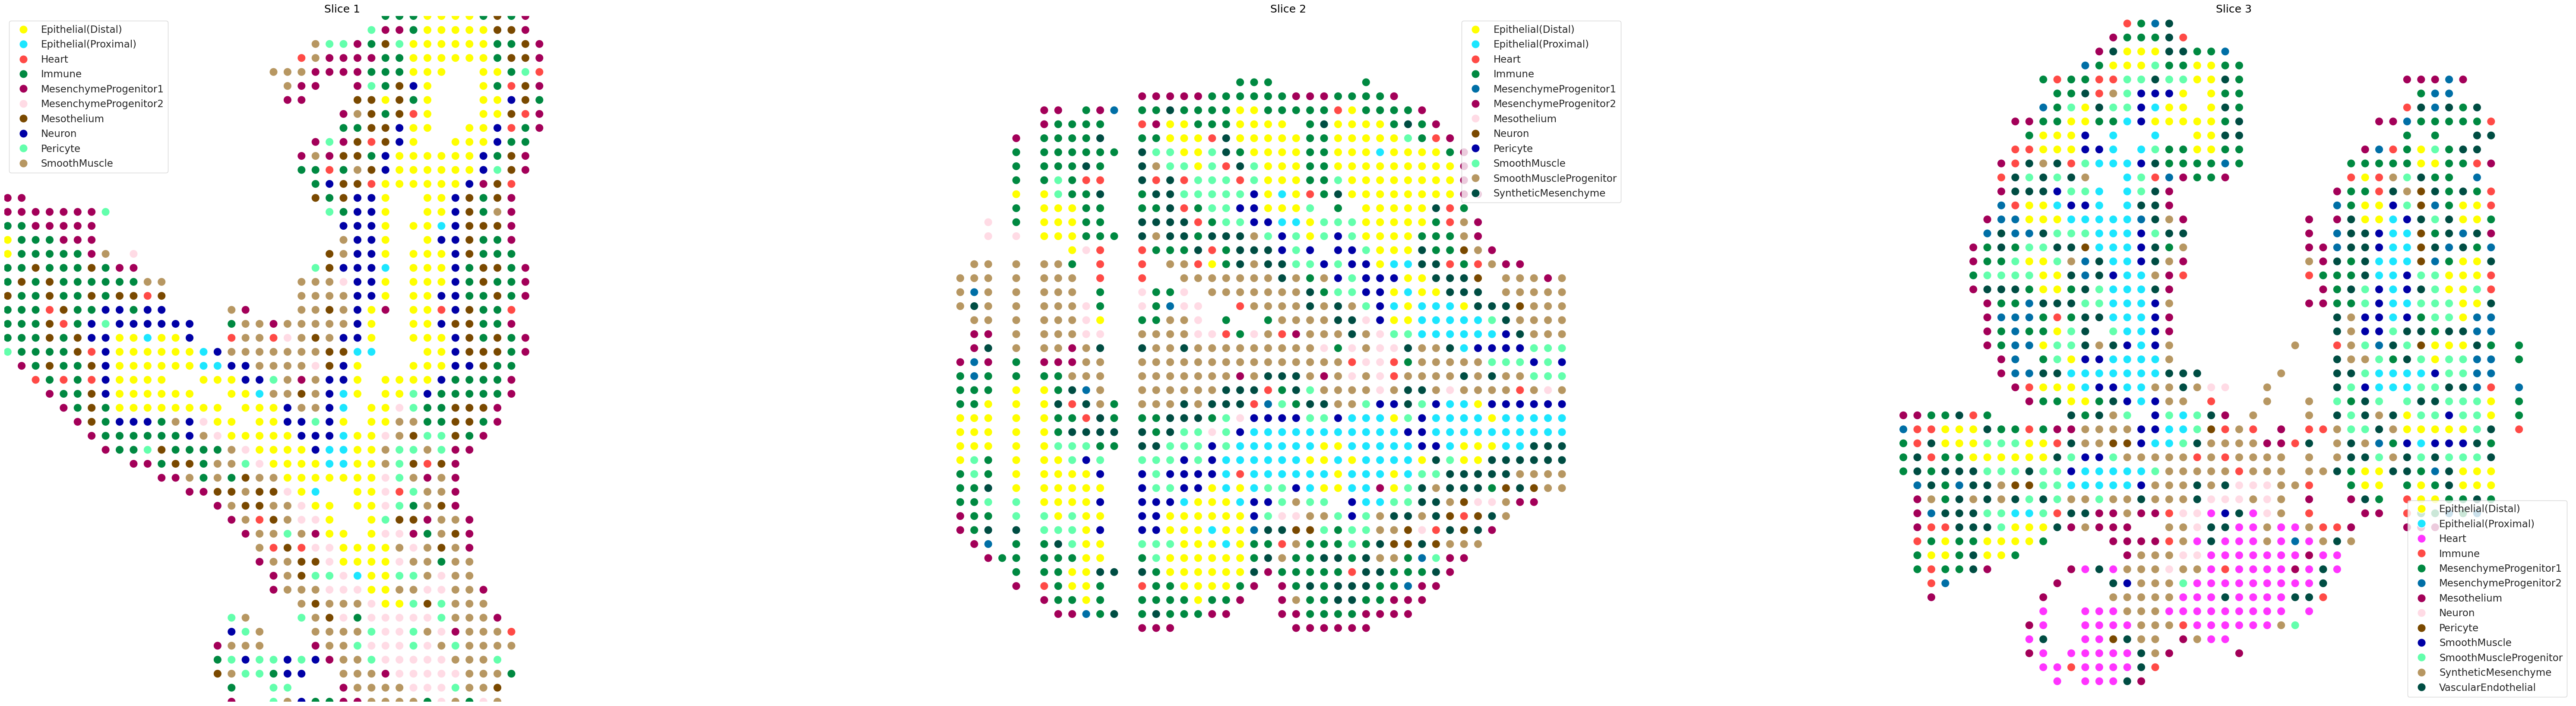

In [11]:
import plotting

plotting.diffmap_from_QT(Qs_ann, Ts_ann, labels, dsf=0.1)
plotting.plot_clusters_from_QT(_spatial_list, Qs_ann, Ts_ann, [labels[-1], labels[-1], labels[-1], labels[-1]], clustering_type='reference', reference_index=2, flip=True, dotsize=200)


Iteration: 0
Iteration: 25
Iteration: 50
Iteration: 75
Initial Wasserstein cost: 1.585114688396061e-07, GW-cost: 1.2242666936105283e-14, Total cost: 1.585115860791575e-08
Final Wasserstein cost: 1.2759521439420496e-07, GW-cost: 1.1771360863594045e-14, Total cost: 1.2759532097561532e-08


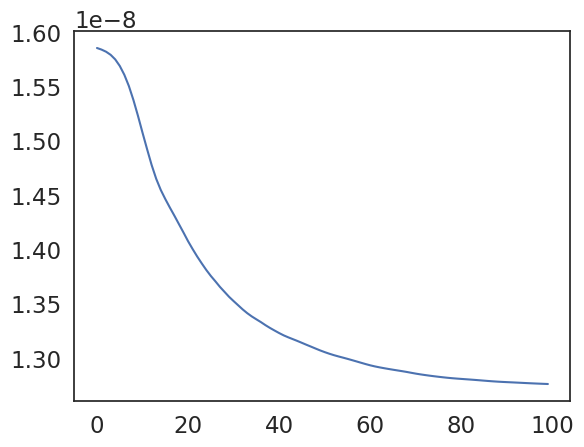

Iteration: 0
Iteration: 25
Iteration: 50
Iteration: 75
Initial Wasserstein cost: 1.1351178130780681e-07, GW-cost: 7.813111526570708e-15, Total cost: 1.135118576911509e-08
Final Wasserstein cost: 9.071716533526342e-08, GW-cost: 7.493166853602025e-15, Total cost: 9.071723816589383e-09


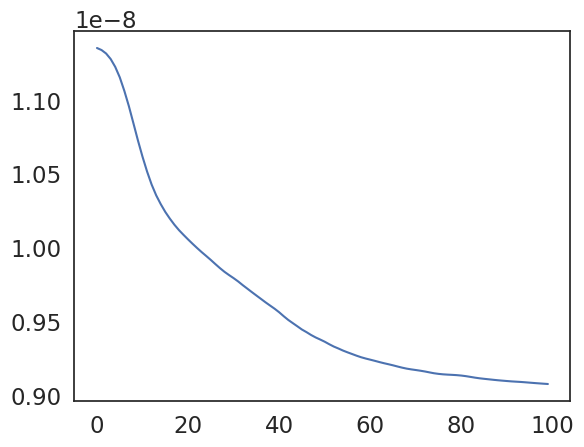

Iteration: 0
Iteration: 25
Iteration: 50
Iteration: 75
Initial Wasserstein cost: 1.5336047454184154e-07, GW-cost: 1.2190821743469742e-14, Total cost: 1.5336057757053823e-08
Final Wasserstein cost: 1.2879597477422067e-07, GW-cost: 1.1729751217093125e-14, Total cost: 1.2879608490834471e-08


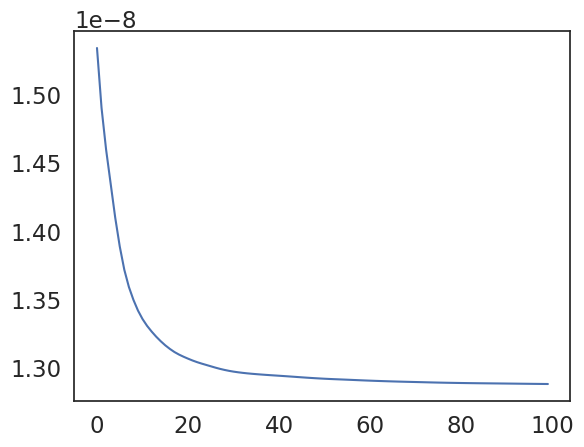

Ranks: r1 13, r2 13, r3 13
Iteration: 0
Iteration: 25
Iteration: 50
Iteration: 75
Initial Wasserstein-sum cost: 2.659760696133162e-07
Final Wasserstein-sum cost: 2.2162441837281222e-07


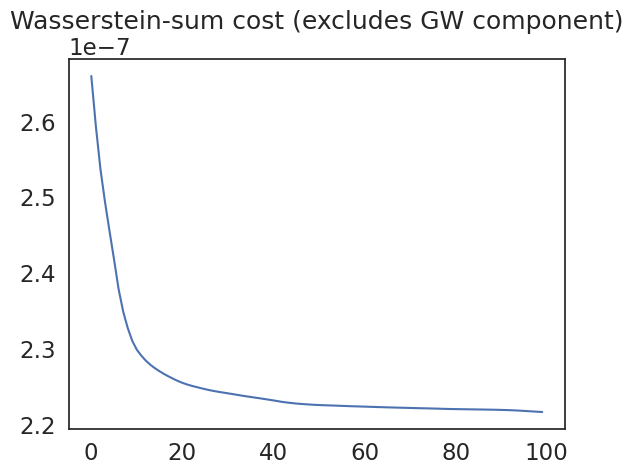

Iteration: 0
Iteration: 25
Iteration: 50
Iteration: 75
Initial Wasserstein cost: 1.475856947763532e-07, GW-cost: 1.2094512403301033e-14, Total cost: 1.4758580135776356e-08
Final Wasserstein cost: 1.2902417267923738e-07, GW-cost: 1.1765484149005995e-14, Total cost: 1.2902428458971826e-08


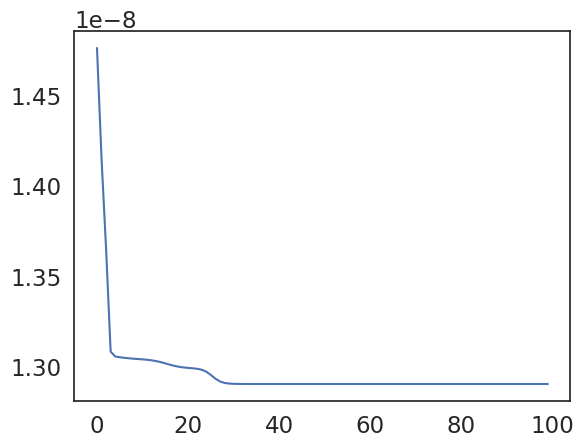

Iteration: 0
Iteration: 25
Iteration: 50
Iteration: 75
Initial Wasserstein cost: 1.0446577647371669e-07, GW-cost: 7.74651949032347e-15, Total cost: 1.044658493043471e-08
Final Wasserstein cost: 9.252016042182731e-08, GW-cost: 7.575689885521222e-15, Total cost: 9.252023147610089e-09


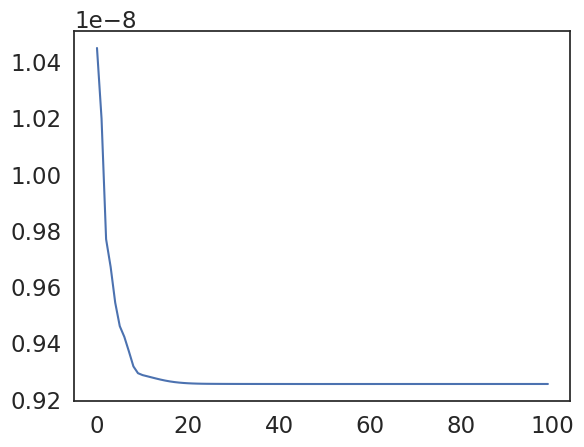

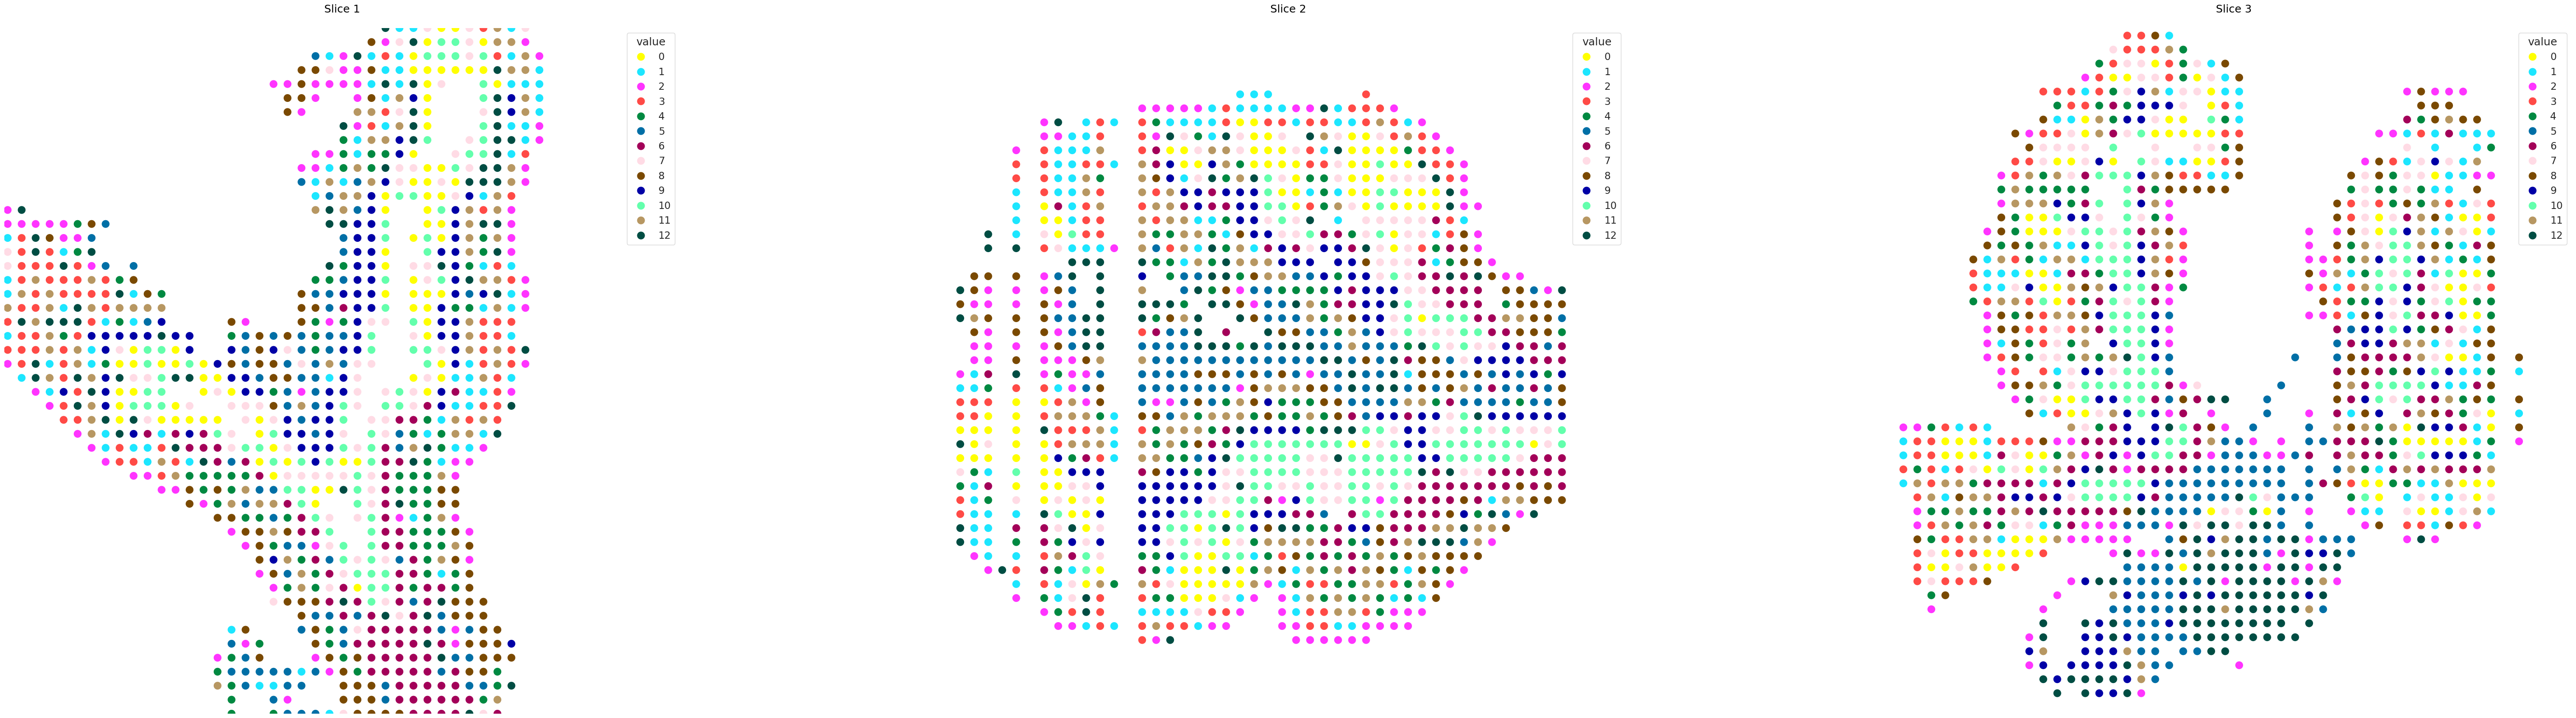

In [42]:

gamma=40 #40
tau_out=5
tau_in=100
alpha = 0.9 #0.1

hmot2 = HiddenMarkovOT.HM_OT(rank_list, tau_in = tau_in, tau_out=tau_out, \
                              gamma=gamma, max_iter=100, min_iter=100, device=device, dtype=dtype, \
                             printCost=True, returnFull=False, alpha=alpha, \
                              initialization='Full', init_args = None)

hmot2.gamma_smoothing(C_factors_sequence, A_factors_sequence)

Ts_u = [T.cpu().numpy() for T in hmot2.T_gammas]
Qs_u = [Q.cpu().numpy() for Q in hmot2.Q_gammas]

clustering.plot_clusters_from_QT(_spatial_list, Qs_u, Ts_u, clustering_type='reference', reference_index=2, flip=True, dotsize=200)

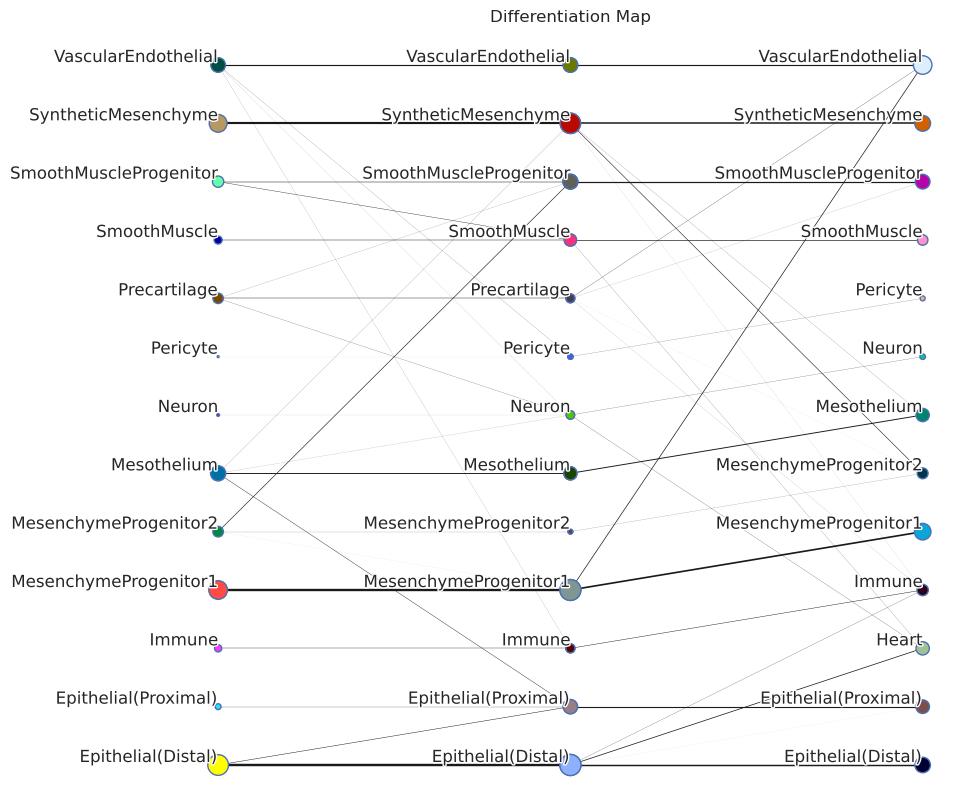

NameError: name 'spatial_list' is not defined

In [43]:
clustering.diffmap_from_QT(Qs_ann, Ts_ann, labels, dsf=1)

_spatial_list = [s.numpy() for s in spatial_list]


clustering.plot_clusters_from_QT(_spatial_list, Qs_ann, Ts_ann, labels, flip=True, dotsize=200)
clustering.plot_clusters_from_QT(_spatial_list, Qs_ann, Ts_ann, [None, None, None, labels[-1]], clustering_type='reference', reference_index=2, flip=True, dotsize=200)
clustering.plot_clusters_from_QT(_spatial_list, Qs_ann, Ts_ann, [labels[0], None, None, None], clustering_type='reference', reference_index=0, flip=True, dotsize=200)
